THIS IS FOR ANALYSIS OF MY MINI PROJECT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
cba_file_path = '/Users/malenamalka/Documents/DATA 400/mini_project/canasta basica .csv'
inflation_file_path = '/Users/malenamalka/Documents/DATA 400/mini_project/arg_inflation.csv'
exchange_file_path = '/Users/malenamalka/Documents/DATA 400/mini_project/exchange_rate.csv'
cba_df = pd.read_csv(cba_file_path)
inflation_df = pd.read_csv(inflation_file_path)
exchange_rate_df =pd.read_csv(exchange_file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/malenamalka/Documents/DATA 400/mini_project/canasta basica .csv'

In [5]:
#Data Cleaning - CBA
cba_df["Year"] = cba_df["Month - Year"].str.extract(r'(\d{2})$').astype(int) + 2000
cba_yearly_df = cba_df.groupby("Year")[["Canasta Basica Alimentaria", "Canasta Basica Total"]].mean().reset_index()
cba_yearly_df

,Year,Canasta Basica Alimentaria,Canasta Basica Total
0,2016,1667.951111,4033.322222
1,2017,1975.602500,4831.954167
2,2018,2667.066667,6676.768333
3,2019,4166.851667,10401.310000
4,2020,6092.989167,14718.236667
5,2021,9178.533333,21524.225000
6,2022,16117.950833,36373.939167
7,2023,40833.848333,88191.855833
8,2024,126722.385000,281322.264167
9,2025,146726.230000,334535.800000


In [37]:
#Data Cleaning - Inflation 
inflation_arg_df = inflation_df.iloc[1, 1:].to_frame().reset_index()
inflation_arg_df.columns = ["Year", "Inflation Rate"]
inflation_arg_df = inflation_arg_df.dropna()
inflation_arg_df["Year"] = inflation_arg_df["Year"].astype(int)
inflation_arg_df["Inflation Rate"] = pd.to_numeric(inflation_arg_df["Inflation Rate"], errors="coerce")
inflation_arg_df.head()

,Year,Inflation Rate
0,2017,25.7
1,2018,34.3
2,2019,53.5
3,2020,42.0
4,2021,48.4


In [38]:
# Convert date column to datetime format (if applicable)
cba_df["Date"] = pd.to_datetime(cba_df["Month - Year"], format="%B-%y", errors='coerce')
cba_df = cba_df.sort_values(by="Date")

In [39]:
cba_df

,Month - Year,Canasta Basica Alimentaria,Canasta Basica Total,Year,Date
0,April-16,1514.53,3663.66,2016,2016-04-01
1,May-16,1561.35,3830.77,2016,2016-05-01
2,June-16,1614.32,3942.67,2016,2016-06-01
3,July-16,1666.48,4033.76,2016,2016-07-01
4,August-16,1675.05,4041.87,2016,2016-08-01
...,...,...,...,...,...
101,September-24,138744.31,312174.70,2024,2024-09-01
102,October-24,140653.57,319283.60,2024,2024-10-01
103,November-24,142148.73,324099.10,2024,2024-11-01
104,December-24,145408.96,331532.43,2024,2024-12-01


/var/folders/z8/02768t9119xbgk92bl8mhrrm0000gn/T/ipykernel_8944/923394105.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/var/folders/z8/02768t9119xbgk92bl8mhrrm0000gn/T/ipykernel_8944/923394105.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/malenamalka/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/malenamalka/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


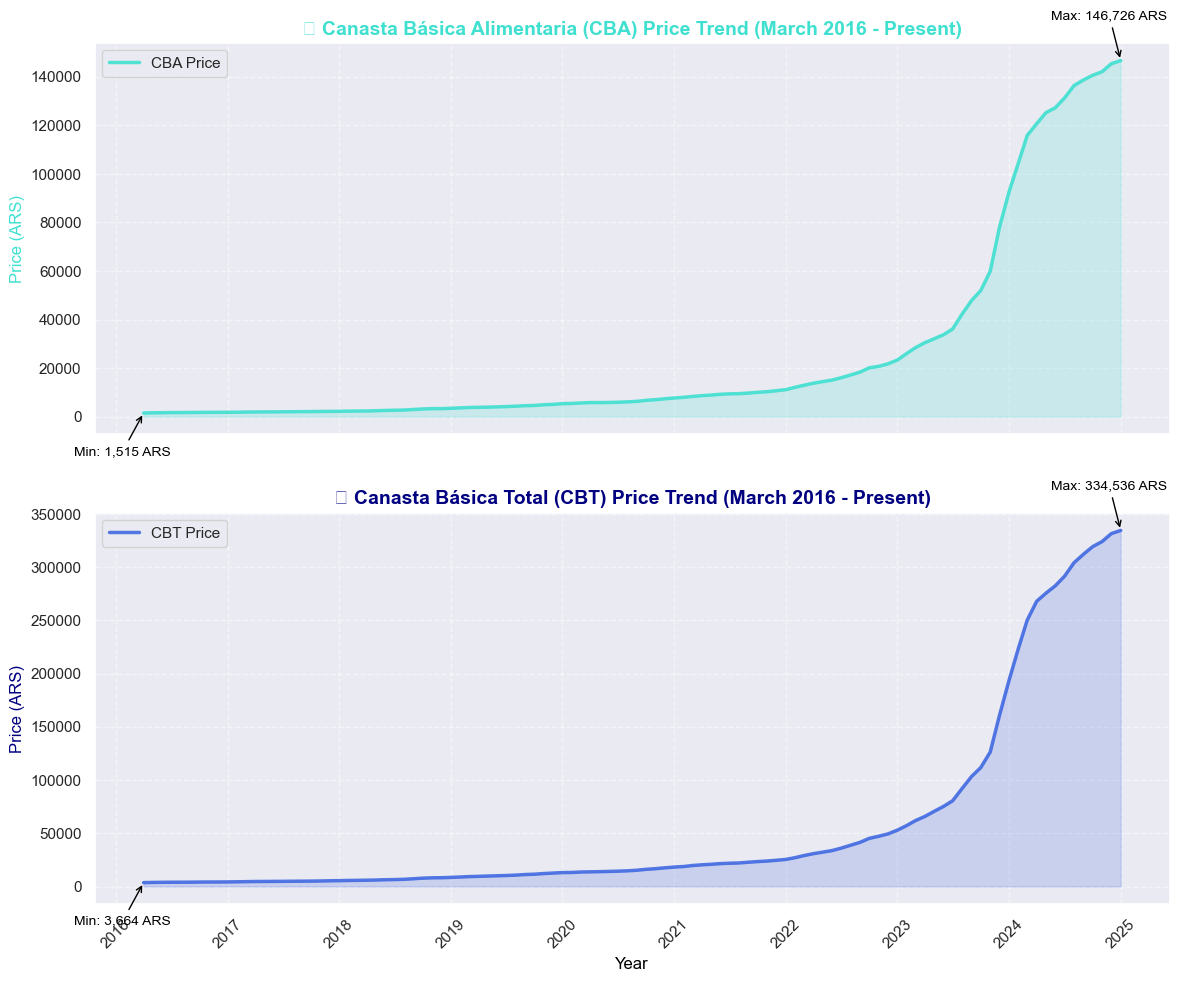

In [40]:
# Set Seaborn style
sns.set_theme(style="darkgrid", palette="magma")

# Create figure and axis
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- CBA Price Visualization ---
ax[0].plot(cba_df["Date"], cba_df["Canasta Basica Alimentaria"], color="turquoise", lw=2.5, alpha=0.9, label="CBA Price")
ax[0].fill_between(cba_df["Date"], cba_df["Canasta Basica Alimentaria"], alpha=0.2, color="turquoise")  # Gradient effect
ax[0].set_title("📈 Canasta Básica Alimentaria (CBA) Price Trend (March 2016 - Present)", 
                fontsize=14, fontweight="bold", color="turquoise")
ax[0].set_ylabel("Price (ARS)", fontsize=12, color="turquoise")
ax[0].legend(loc="upper left")
ax[0].grid(True, linestyle="--", alpha=0.5)

# Highlighting max and min points
max_idx = cba_df["Canasta Basica Alimentaria"].idxmax()
min_idx = cba_df["Canasta Basica Alimentaria"].idxmin()
ax[0].annotate(f"Max: {cba_df['Canasta Basica Alimentaria'][max_idx]:,.0f} ARS",
               xy=(cba_df["Date"][max_idx], cba_df["Canasta Basica Alimentaria"][max_idx]),
               xytext=(-50, 30), textcoords="offset points",
               arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")
ax[0].annotate(f"Min: {cba_df['Canasta Basica Alimentaria'][min_idx]:,.0f} ARS",
               xy=(cba_df["Date"][min_idx], cba_df["Canasta Basica Alimentaria"][min_idx]),
               xytext=(-50, -30), textcoords="offset points",
               arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")
# --- CBT Price Visualization ---
ax[1].plot(cba_df["Date"], cba_df["Canasta Basica Total"], color="royalblue", lw=2.5, alpha=0.9, label="CBT Price")
ax[1].fill_between(cba_df["Date"], cba_df["Canasta Basica Total"], alpha=0.2, color="royalblue")  # Gradient effect
ax[1].set_title("📊 Canasta Básica Total (CBT) Price Trend (March 2016 - Present)", 
                fontsize=14, fontweight="bold", color="navy")
ax[1].set_xlabel("Year", fontsize=12, color="black")
ax[1].set_ylabel("Price (ARS)", fontsize=12, color="navy")
ax[1].legend(loc="upper left")
ax[1].grid(True, linestyle="--", alpha=0.5)

# Highlighting max and min points
max_idx = cba_df["Canasta Basica Total"].idxmax()
min_idx = cba_df["Canasta Basica Total"].idxmin()
ax[1].annotate(f"Max: {cba_df['Canasta Basica Total'][max_idx]:,.0f} ARS",
               xy=(cba_df["Date"][max_idx], cba_df["Canasta Basica Total"][max_idx]),
               xytext=(-50, 30), textcoords="offset points",
               arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")
ax[1].annotate(f"Min: {cba_df['Canasta Basica Total'][min_idx]:,.0f} ARS",
               xy=(cba_df["Date"][min_idx], cba_df["Canasta Basica Total"][min_idx]),
               xytext=(-50, -30), textcoords="offset points",
               arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")

# Adjust layout and show
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Merge Data
merged_df = pd.merge(cba_yearly_df, inflation_arg_df, on="Year", how="inner")
# Define independent (X) and dependent (y) variables
X = merged_df["Inflation Rate"].values
y_cba = merged_df["Canasta Basica Alimentaria"].values
y_cbt = merged_df["Canasta Basica Total"].values

In [42]:
# Function to calculate linear regression coefficients
def linear_regression(X, y):
    n = len(X)
    mean_x, mean_y = np.mean(X), np.mean(y)
    
    # Calculate slope (m) and intercept (b)
    numerator = np.sum((X - mean_x) * (y - mean_y))
    denominator = np.sum((X - mean_x) ** 2)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x
    
    # Compute R-squared
    y_pred = slope * X + intercept
    ss_total = np.sum((y - mean_y) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return slope, intercept, r_squared, y_pred


In [43]:
# Perform Linear Regression
slope_cba, intercept_cba, r_squared_cba, y_pred_cba = linear_regression(X, y_cba)
slope_cbt, intercept_cbt, r_squared_cbt, y_pred_cbt = linear_regression(X, y_cbt)

In [44]:
# Print Regression Results
print(f"CBA Regression: Coeff: {slope_cba}, Intercept: {intercept_cba}, R²: {r_squared_cba}")
print(f"CBT Regression: Coeff: {slope_cbt}, Intercept: {intercept_cbt}, R²: {r_squared_cbt}")

CBA Regression: Coeff: 542.5835715530903, Intercept: -2952.776089081708, R²: 0.387222922199141
CBT Regression: Coeff: 1191.6223071323811, Intercept: -4255.5547739709, R²: 0.3688196432010893


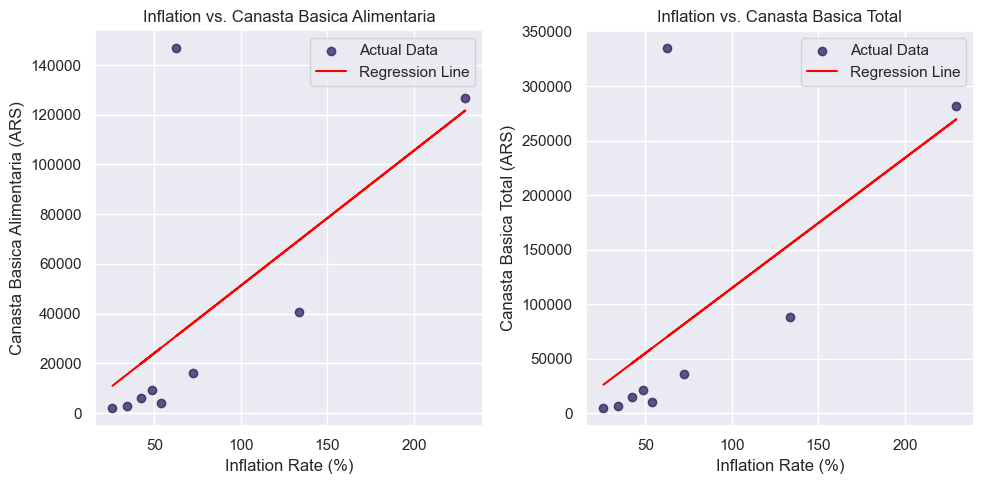

In [45]:
# Plot results
plt.figure(figsize=(10, 5))

# CBA Regression
plt.subplot(1, 2, 1)
plt.scatter(X, y_cba, label="Actual Data", alpha=0.7)
plt.plot(X, y_pred_cba, color="red", label="Regression Line")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Canasta Basica Alimentaria (ARS)")
plt.title("Inflation vs. Canasta Basica Alimentaria")
plt.legend()
plt.grid(True)

# CBT Regression
plt.subplot(1, 2, 2)
plt.scatter(X, y_cbt, label="Actual Data", alpha=0.7)
plt.plot(X, y_pred_cbt, color="red", label="Regression Line")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Canasta Basica Total (ARS)")
plt.title("Inflation vs. Canasta Basica Total")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
# Merge Data
merged_df = pd.merge(cba_yearly_df, inflation_arg_df, on="Year", how="inner")

# Define independent (X) and dependent (y) variables
X = merged_df[["Inflation Rate"]].values
y_cba = merged_df["Canasta Basica Alimentaria"].values
y_cbt = merged_df["Canasta Basica Total"].values

# Initialize and fit the models
model_cba = LinearRegression().fit(X, y_cba)
model_cbt = LinearRegression().fit(X, y_cbt)

# Generate predictions
y_pred_cba = model_cba.predict(X)
y_pred_cbt = model_cbt.predict(X)

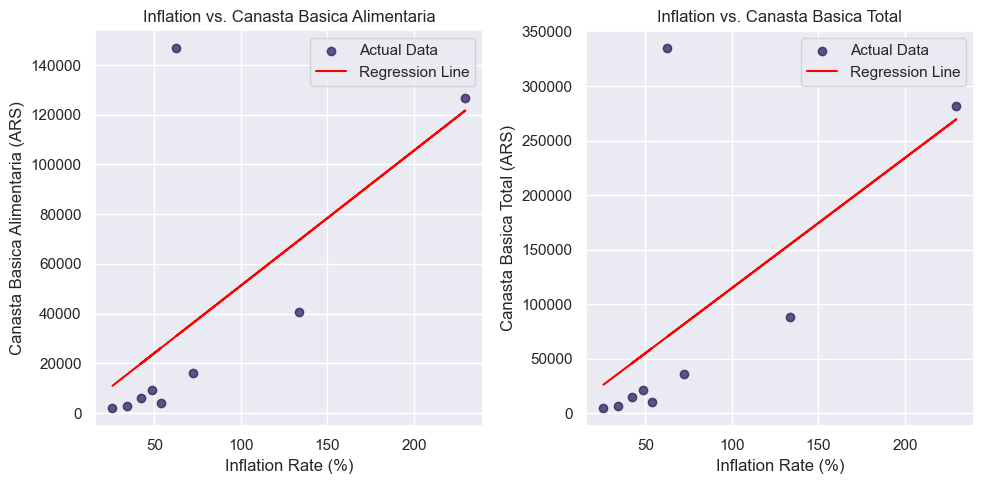

CBA Regression: Coeff: 542.5835715530902, Intercept: -2952.776089081701, R²: 0.387222922199141
CBT Regression: Coeff: 1191.622307132381, Intercept: -4255.554773970885, R²: 0.3688196432010893


In [47]:
# Plot results
plt.figure(figsize=(10, 5))

# CBA Regression
plt.subplot(1, 2, 1)
plt.scatter(X, y_cba, label="Actual Data", alpha=0.7)
plt.plot(X, y_pred_cba, color="red", label="Regression Line")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Canasta Basica Alimentaria (ARS)")
plt.title("Inflation vs. Canasta Basica Alimentaria")
plt.legend()
plt.grid(True)

# CBT Regression
plt.subplot(1, 2, 2)
plt.scatter(X, y_cbt, label="Actual Data", alpha=0.7)
plt.plot(X, y_pred_cbt, color="red", label="Regression Line")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Canasta Basica Total (ARS)")
plt.title("Inflation vs. Canasta Basica Total")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print Regression Results
print(f"CBA Regression: Coeff: {model_cba.coef_[0]}, Intercept: {model_cba.intercept_}, R²: {model_cba.score(X, y_cba)}")
print(f"CBT Regression: Coeff: {model_cbt.coef_[0]}, Intercept: {model_cbt.intercept_}, R²: {model_cbt.score(X, y_cbt)}")

In [62]:
# Load the UE dataset
gdp_file_path = '/Users/malenamalka/Documents/DATA 400/mini_project/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_105.csv'
gdp_df = pd.read_csv(gdp_file_path, skiprows=4)  # Skipping metadata rows

# Filter only for Argentina
gdp_arg_df = gdp_df[gdp_df["Country Name"] == "Argentina"].drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])
gdp_arg_df = gdp_arg_df.melt(var_name="Year", value_name="GDP").dropna()
gdp_arg_df["Year"] = gdp_arg_df["Year"].astype(int)
# Define independent (X) and dependent (y) variables
X = merged_df[["GDP"]].values
y_cba = merged_df["Canasta Basica Alimentaria"].values
y_cbt = merged_df["Canasta Basica Total"].values

# Initialize and fit the models
model_cba = LinearRegression().fit(X, y_cba)
model_cbt = LinearRegression().fit(X, y_cbt)

# Generate predictions
y_pred_cba = model_cba.predict(X)
y_pred_cbt = model_cbt.predict(X)

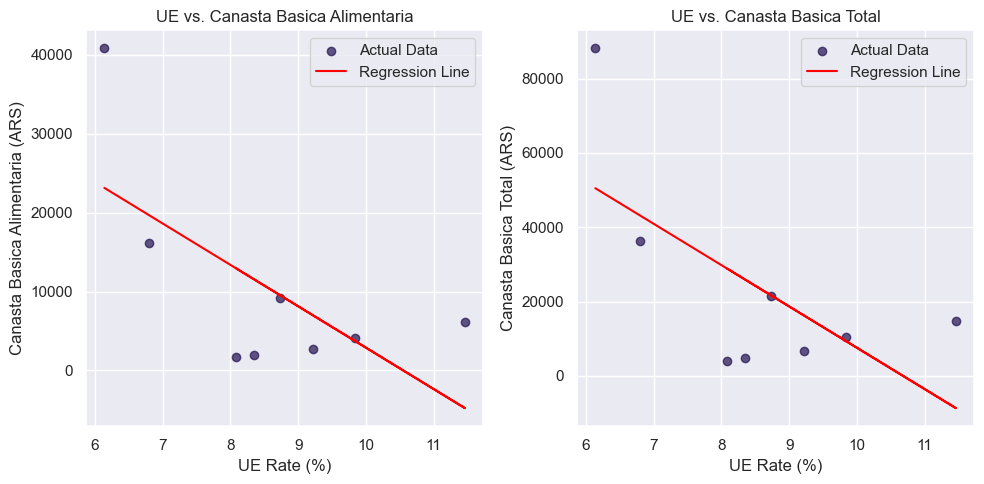

CBA Regression: Coeff: -5247.52437954192, Intercept: 55358.7346156688, R²: 0.44375349416189824
CBT Regression: Coeff: -11130.89159422853, Intercept: 118841.43585629479, R²: 0.43562319352554424


In [70]:
# Plot results
plt.figure(figsize=(10, 5))

# CBA Regression
plt.subplot(1, 2, 1)
plt.scatter(X, y_cba, label="Actual Data", alpha=0.7)
plt.plot(X, y_pred_cba, color="red", label="Regression Line")
plt.xlabel("UE Rate (%)")
plt.ylabel("Canasta Basica Alimentaria (ARS)")
plt.title("UE vs. Canasta Basica Alimentaria")
plt.legend()
plt.grid(True)

# CBT Regression
plt.subplot(1, 2, 2)
plt.scatter(X, y_cbt, label="Actual Data", alpha=0.7)
plt.plot(X, y_pred_cbt, color="red", label="Regression Line")
plt.xlabel("UE Rate (%)")
plt.ylabel("Canasta Basica Total (ARS)")
plt.title("UE vs. Canasta Basica Total")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print Regression Results
print(f"CBA Regression: Coeff: {model_cba.coef_[0]}, Intercept: {model_cba.intercept_}, R²: {model_cba.score(X, y_cba)}")
print(f"CBT Regression: Coeff: {model_cbt.coef_[0]}, Intercept: {model_cbt.intercept_}, R²: {model_cbt.score(X, y_cbt)}")

In [69]:
merged_df["Unemployment Rate %"] = merged_df["GDP"]
merged_df= merged_df.drop(columns=["GDP"])
merged_df

,Year,Canasta Basica Alimentaria,Canasta Basica Total,Unemployment Rate %
0,2016,1667.951111,4033.322222,8.085
1,2017,1975.602500,4831.954167,8.347
2,2018,2667.066667,6676.768333,9.220
3,2019,4166.851667,10401.310000,9.843
4,2020,6092.989167,14718.236667,11.461
5,2021,9178.533333,21524.225000,8.736
6,2022,16117.950833,36373.939167,6.805
7,2023,40833.848333,88191.855833,6.139


In [69]:
merged_df["Unemployment Rate %"] = merged_df["GDP"]
merged_df= merged_df.drop(columns=["GDP"])
merged_df

,Year,Canasta Basica Alimentaria,Canasta Basica Total,Unemployment Rate %
0,2016,1667.951111,4033.322222,8.085
1,2017,1975.602500,4831.954167,8.347
2,2018,2667.066667,6676.768333,9.220
3,2019,4166.851667,10401.310000,9.843
4,2020,6092.989167,14718.236667,11.461
5,2021,9178.533333,21524.225000,8.736
6,2022,16117.950833,36373.939167,6.805
7,2023,40833.848333,88191.855833,6.139


In [60]:
# Load the UE dataset
ue_file_path = '/Users/malenamalka/Documents/DATA 400/mini_project/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_105.csv'
ue_df = pd.read_csv(ue_file_path, skiprows=4)  # Skipping metadata rows

# Filter only for Argentina
ue_arg_df = gdp_df[gdp_df["Country Name"] == "Argentina"].drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])
ue_arg_df = gdp_arg_df.melt(var_name="Year", value_name="GDP").dropna()
ue_arg_df["Year"] = gdp_arg_df["Year"].astype(int)
# Define independent (X) and dependent (y) variables
X = merged_df[["GDP"]].values
y_cba = merged_df["Canasta Basica Alimentaria"].values
y_cbt = merged_df["Canasta Basica Total"].values

# Initialize and fit the models
model_cba = LinearRegression().fit(X, y_cba)
model_cbt = LinearRegression().fit(X, y_cbt)

# Generate predictions
y_pred_cba = model_cba.predict(X)
y_pred_cbt = model_cbt.predict(X)

NameError: name 'tools' is not defined

In [72]:
# Load datasets (assumed structure)
gdp_deflator_df = pd.read_csv('/Users/malenamalka/Documents/DATA 400/mini_project/gdp_deflator.csv')  # Replace with actual file path
# Inspect the first few rows of the datasets
print("GDP Deflator Data:")
print(gdp_deflator_df.head())

print("\nCanasta Basica Data:")
print(cba_df.head())

# Merge Data on "Year"
merged_df = pd.merge(cba_yearly_df, gdp_deflator_df, on="Year", how="inner")

# Define independent (X) and dependent (y) variables
X = merged_df["GDP Deflator"].values  # Independent variable
y_cba = merged_df["Canasta Basica Alimentaria"].values  # Dependent variable 1
y_cbt = merged_df["Canasta Basica Total"].values  # Dependent variable 2

# Function to calculate linear regression coefficients manually
def linear_regression(X, y):
    n = len(X)
    mean_x, mean_y = np.mean(X), np.mean(y)
    
    # Calculate slope (m) and intercept (b)
    numerator = np.sum((X - mean_x) * (y - mean_y))
    denominator = np.sum((X - mean_x) ** 2)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x
    
    # Compute R-squared
    y_pred = slope * X + intercept
    ss_total = np.sum((y - mean_y) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return slope, intercept, r_squared, y_pred

# Perform Linear Regression
slope_cba, intercept_cba, r_squared_cba, y_pred_cba = linear_regression(X, y_cba)
slope_cbt, intercept_cbt, r_squared_cbt, y_pred_cbt = linear_regression(X, y_cbt)

# Print Regression Results
print(f"\nCBA Regression: Coeff: {slope_cba}, Intercept: {intercept_cba}, R²: {r_squared_cba}")
print(f"CBT Regression: Coeff: {slope_cbt}, Intercept: {intercept_cbt}, R²: {r_squared_cbt}")


GDP Deflator Data:
   Year  GDP Deflator
0  2004          40.4
1  2005          44.5
2  2006          50.6
3  2007          58.2
4  2008          71.7

Canasta Basica Data:
  Month - Year  Canasta Basica Alimentaria  Canasta Basica Total
0     April-16                     1514.53               3663.66
1       May-16                     1561.35               3830.77
2      June-16                     1614.32               3942.67
3      July-16                     1666.48               4033.76
4    August-16                     1675.05               4041.87

CBA Regression: Coeff: 3.529727491318894, Intercept: -172.53302711188826, R²: 0.9992866323328055
CBT Regression: Coeff: 7.883988022720947, Intercept: 335.4708741546783, R²: 0.9994505433323989


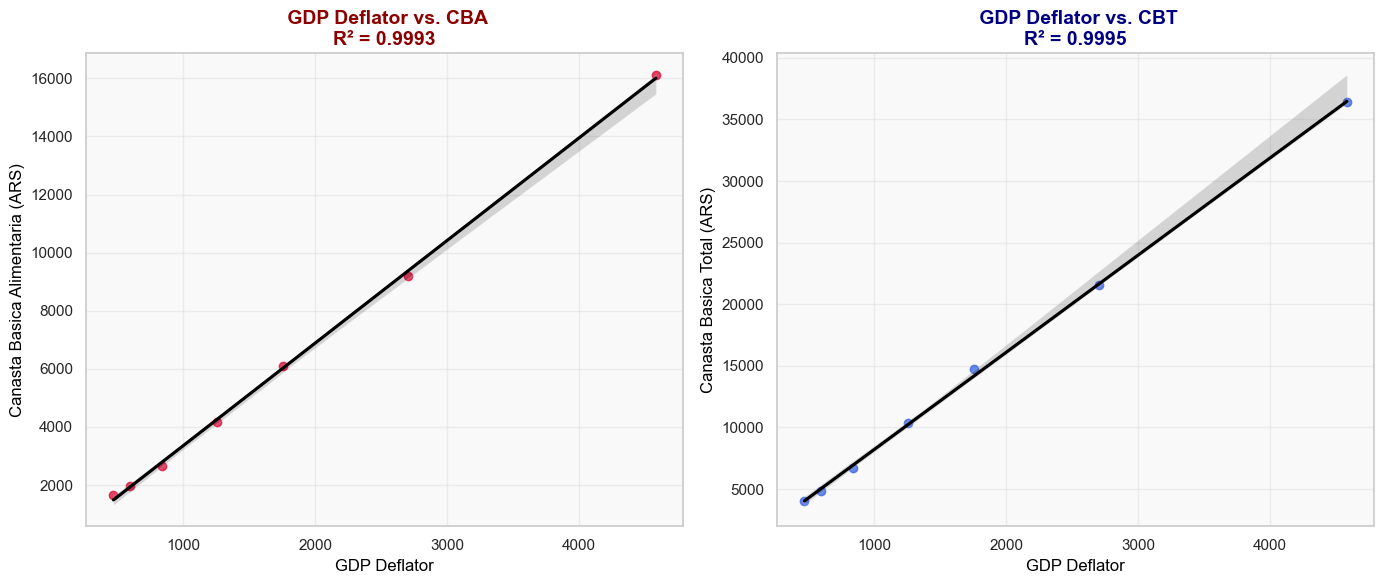

In [75]:
# Set Seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Create figure for plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Colors
scatter_color_cba = "crimson"
scatter_color_cbt = "royalblue"
line_color = "black"

# Plot CBA Regression
sns.regplot(x=X, y=y_cba, scatter=True, color=scatter_color_cba, line_kws={"color": line_color}, ax=ax[0])
ax[0].set_xlabel("GDP Deflator", fontsize=12, color="black")
ax[0].set_ylabel("Canasta Basica Alimentaria (ARS)", fontsize=12, color="black")
ax[0].set_title(f" GDP Deflator vs. CBA\nR² = {r_squared_cba:.4f}", fontsize=14, fontweight="bold", color="darkred")
ax[0].grid(alpha=0.3)
ax[0].set_facecolor("#f9f9f9")

# Plot CBT Regression
sns.regplot(x=X, y=y_cbt, scatter=True, color=scatter_color_cbt, line_kws={"color": line_color}, ax=ax[1])
ax[1].set_xlabel("GDP Deflator", fontsize=12, color="black")
ax[1].set_ylabel("Canasta Basica Total (ARS)", fontsize=12, color="black")
ax[1].set_title(f" GDP Deflator vs. CBT\nR² = {r_squared_cbt:.4f}", fontsize=14, fontweight="bold", color="navy")
ax[1].grid(alpha=0.3)
ax[1].set_facecolor("#f9f9f9")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [6]:
# Load the GDP dataset
gdp_file_path = '/Users/malenamalka/Documents/DATA 400/mini_project/data/GDP_data.csv'
gdp_df = pd.read_csv(gdp_file_path, skiprows=4)  # Skipping metadata rows

cba_file_path = '/Users/malenamalka/Documents/DATA 400/mini_project/data/canasta basica .csv'
cba_df = pd.read_csv(cba_file_path)


# Filter only for Argentina
gdp_arg_df = gdp_df[gdp_df["Country Name"] == "Argentina"].drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])
gdp_arg_df = gdp_arg_df.melt(var_name="Year", value_name="GDP").dropna()
gdp_arg_df["Year"] = gdp_arg_df["Year"].astype(int)


In [8]:
# Define independent (X) and dependent (y) variables
# Merge Data
merged_df = pd.merge(cba_yearly_df, gdp_arg_df, on="Year", how="inner")

X = merged_df[["GDP"]].values
y_cba = merged_df["Canasta Basica Alimentaria"].values
y_cbt = merged_df["Canasta Basica Total"].values

# Initialize and fit the models
model_cba = LinearRegression().fit(X, y_cba)
model_cbt = LinearRegression().fit(X, y_cbt)

# Generate predictions
y_pred_cba = model_cba.predict(X)
y_pred_cbt = model_cbt.predict(X)

In [10]:

# Define independent (X) and dependent (y) variables
X = merged_df["GDP"].values  # Independent variable
y_cba = merged_df["Canasta Basica Alimentaria"].values  # Dependent variable 1
y_cbt = merged_df["Canasta Basica Total"].values  # Dependent variable 2

# Function to calculate linear regression coefficients manually
def linear_regression(X, y):
    n = len(X)
    mean_x, mean_y = np.mean(X), np.mean(y)
    
    # Calculate slope (m) and intercept (b)
    numerator = np.sum((X - mean_x) * (y - mean_y))
    denominator = np.sum((X - mean_x) ** 2)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x
    
    # Compute R-squared
    y_pred = slope * X + intercept
    ss_total = np.sum((y - mean_y) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return slope, intercept, r_squared, y_pred

# Perform Linear Regression
slope_cba, intercept_cba, r_squared_cba, y_pred_cba = linear_regression(X, y_cba)
slope_cbt, intercept_cbt, r_squared_cbt, y_pred_cbt = linear_regression(X, y_cbt)

# Print Regression Results
print(f"\nCBA Regression: Coeff: {slope_cba}, Intercept: {intercept_cba}, R²: {r_squared_cba}")
print(f"CBT Regression: Coeff: {slope_cbt}, Intercept: {intercept_cbt}, R²: {r_squared_cbt}")



CBA Regression: Coeff: 6.267458876554092e-08, Intercept: -23545.10790229818, R²: 0.2126220487420748
CBT Regression: Coeff: 1.3131414495969047e-07, Intercept: -47646.20263842166, R²: 0.20364163026858118


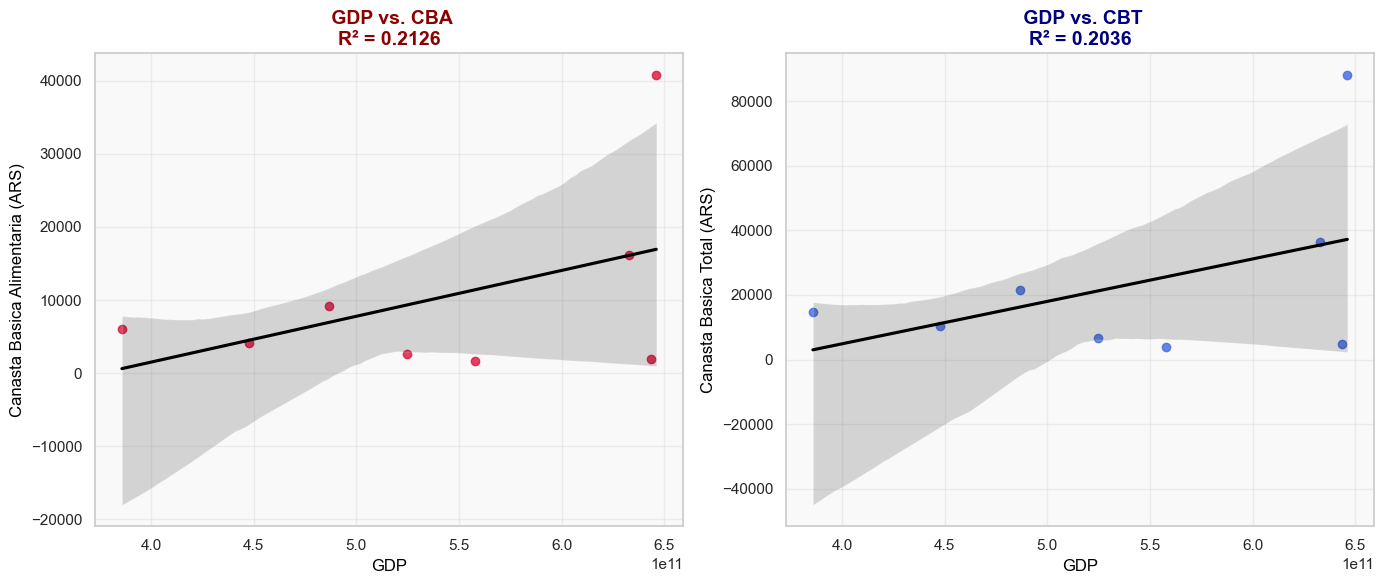

In [12]:
# Set Seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Create figure for plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Colors
scatter_color_cba = "crimson"
scatter_color_cbt = "royalblue"
line_color = "black"

# Plot CBA Regression
sns.regplot(x=X, y=y_cba, scatter=True, color=scatter_color_cba, line_kws={"color": line_color}, ax=ax[0])
ax[0].set_xlabel("GDP", fontsize=12, color="black")
ax[0].set_ylabel("Canasta Basica Alimentaria (ARS)", fontsize=12, color="black")
ax[0].set_title(f" GDP vs. CBA\nR² = {r_squared_cba:.4f}", fontsize=14, fontweight="bold", color="darkred")
ax[0].grid(alpha=0.3)
ax[0].set_facecolor("#f9f9f9")

# Plot CBT Regression
sns.regplot(x=X, y=y_cbt, scatter=True, color=scatter_color_cbt, line_kws={"color": line_color}, ax=ax[1])
ax[1].set_xlabel("GDP", fontsize=12, color="black")
ax[1].set_ylabel("Canasta Basica Total (ARS)", fontsize=12, color="black")
ax[1].set_title(f" GDP vs. CBT\nR² = {r_squared_cbt:.4f}", fontsize=14, fontweight="bold", color="navy")
ax[1].grid(alpha=0.3)
ax[1].set_facecolor("#f9f9f9")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()